# Import

In [65]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import copy

# Figure

In [136]:
T = 200
t = np.arange(T)/T * 5

x = 0.1*np.sin(2*t)+0.1*np.sin(4*t)+0.1*np.sin(8*t)
missing_indices = np.random.choice(x.shape[0], 150, replace=False)

In [154]:
3/4

0.75

## Linear

In [137]:
_x = x.copy()

In [138]:
_x = _x.astype(float)  # Change data type to float
_x[missing_indices] = np.nan

In [139]:
x_bar = pd.DataFrame(_x).interpolate(method='linear',axis=0).fillna(method='bfill').fillna(method='ffill').to_numpy().tolist()

## Cubic

In [140]:
_x1 = x.copy()

In [141]:
_x1 = _x1.astype(float)  # Change data type to float
_x1[missing_indices] = np.nan

In [142]:
x1_bar = pd.DataFrame(_x1).interpolate(method='cubic',axis=0).fillna(method='bfill').fillna(method='ffill').to_numpy().tolist()

## Nearest

In [143]:
_x2 = x.copy()

In [144]:
_x2 = _x2.astype(float)  # Change data type to float
_x2[missing_indices] = np.nan

In [145]:
x2_bar = pd.DataFrame(_x2).interpolate(method='cubic',axis=0).fillna(method='bfill').fillna(method='ffill').to_numpy().tolist()

## Result

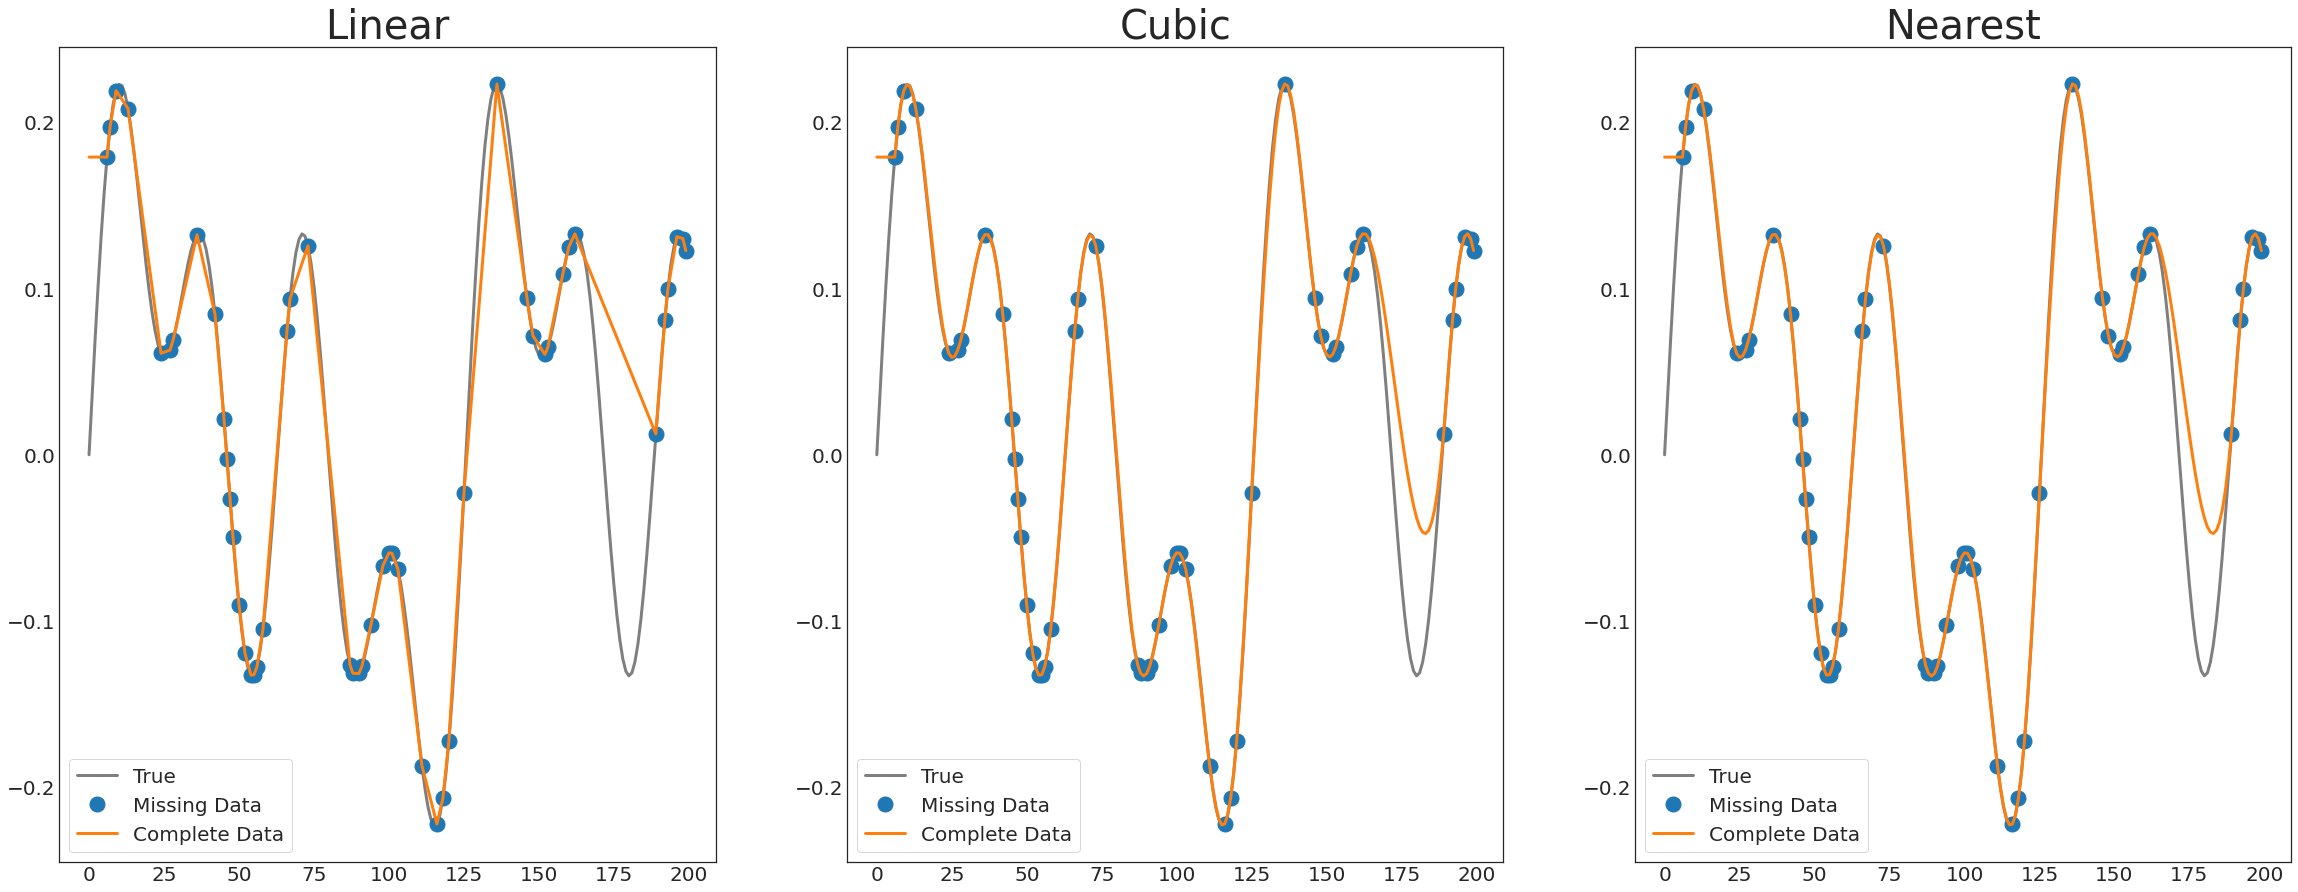

In [153]:
with plt.style.context('seaborn-white'):
    fig, (ax1, ax2, ax3) = plt.subplots(1, 3,figsize=(40,15))
    
    ax1.tick_params(axis='y', labelsize=20)
    ax1.tick_params(axis='x', labelsize=20)
    ax1.set_title('Linear',fontsize=40)   
    ax1.plot(x,'-',alpha=0.5,lw=3,label='True',color='black')       
    ax1.plot(_x,'o',markersize=15,label='Missing Data')
    ax1.plot(x_bar,'-',lw=3,label='Complete Data')
    ax1.legend(fontsize=20,loc='lower left',facecolor='white', frameon=True)
    
    ax2.tick_params(axis='y', labelsize=20)
    ax2.tick_params(axis='x', labelsize=20)
    ax2.set_title('Cubic',fontsize=40)      
    ax2.plot(x,'-',alpha=0.5,lw=3,label='True',color='black')  
    ax2.plot(_x1,'o',markersize=15,label='Missing Data')
    ax2.plot(x1_bar,'-',lw=3,label='Complete Data')
    ax2.legend(fontsize=20,loc='lower left',facecolor='white', frameon=True)
    
    ax3.tick_params(axis='y', labelsize=20)
    ax3.tick_params(axis='x', labelsize=20)
    ax3.set_title('Nearest',fontsize=40)     
    ax3.plot(x,'-',alpha=0.5,lw=3,label='True',color='black')  
    ax3.plot(_x2,'o',markersize=15,label='Missing Data')
    ax3.plot(x2_bar,'-',lw=3,label='Complete Data')
    ax3.legend(fontsize=20,loc='lower left',facecolor='white', frameon=True)
plt.savefig('fig1.png')

# Graph

In [ ]:
from rpy2.robjects.vectors import FloatVector
import rpy2.robjects as robjects
from rpy2.robjects.packages import importr
import rpy2.robjects.numpy2ri as rpyn
GNAR = importr('GNAR') # import GNAR 
#igraph = importr('igraph') # import igraph 
ebayesthresh = importr('EbayesThresh').ebayesthresh
